# **Import Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, KFold

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

# **Loading Data**

In [2]:
df = pd.read_csv('../Credit_Card_Churn_Project/BankChurners.csv')

In [3]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [4]:
df = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

In [5]:
df.shape

(10127, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Check for duplicated data

In [8]:
df.duplicated().values.any()

False

Check for null data

In [9]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df)

,Total,Percentage
CLIENTNUM,0,0.0
Months_Inactive_12_mon,0,0.0
Total_Ct_Chng_Q4_Q1,0,0.0
Total_Trans_Ct,0,0.0
Total_Trans_Amt,0,0.0
Total_Amt_Chng_Q4_Q1,0,0.0
Avg_Open_To_Buy,0,0.0
Total_Revolving_Bal,0,0.0
Credit_Limit,0,0.0
Contacts_Count_12_mon,0,0.0


# **Exploratory Data Analysis**

Description of numerical data

In [10]:
numerical_features = df.drop(columns=['CLIENTNUM']).select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
summary_stats

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


Description of categorical data

In [11]:
categorical_features = df.select_dtypes(include=[object])
cat_summary_stats = categorical_features.describe().T
cat_summary_stats

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,10127,7,Graduate,3128
Marital_Status,10127,4,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


Change Attrition_Flag into binary data in order to apply seaborn's heatmap function to specify correlation between columns

In [12]:
numerical_features['Attrited_Status'] = categorical_features['Attrition_Flag'].apply(lambda x : 1 if x == 'Attrited Customer' else 0)
numerical_features['Attrited_Status'] = numerical_features['Attrited_Status'].astype('category')
numerical_features.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrited_Status
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


<Axes: >

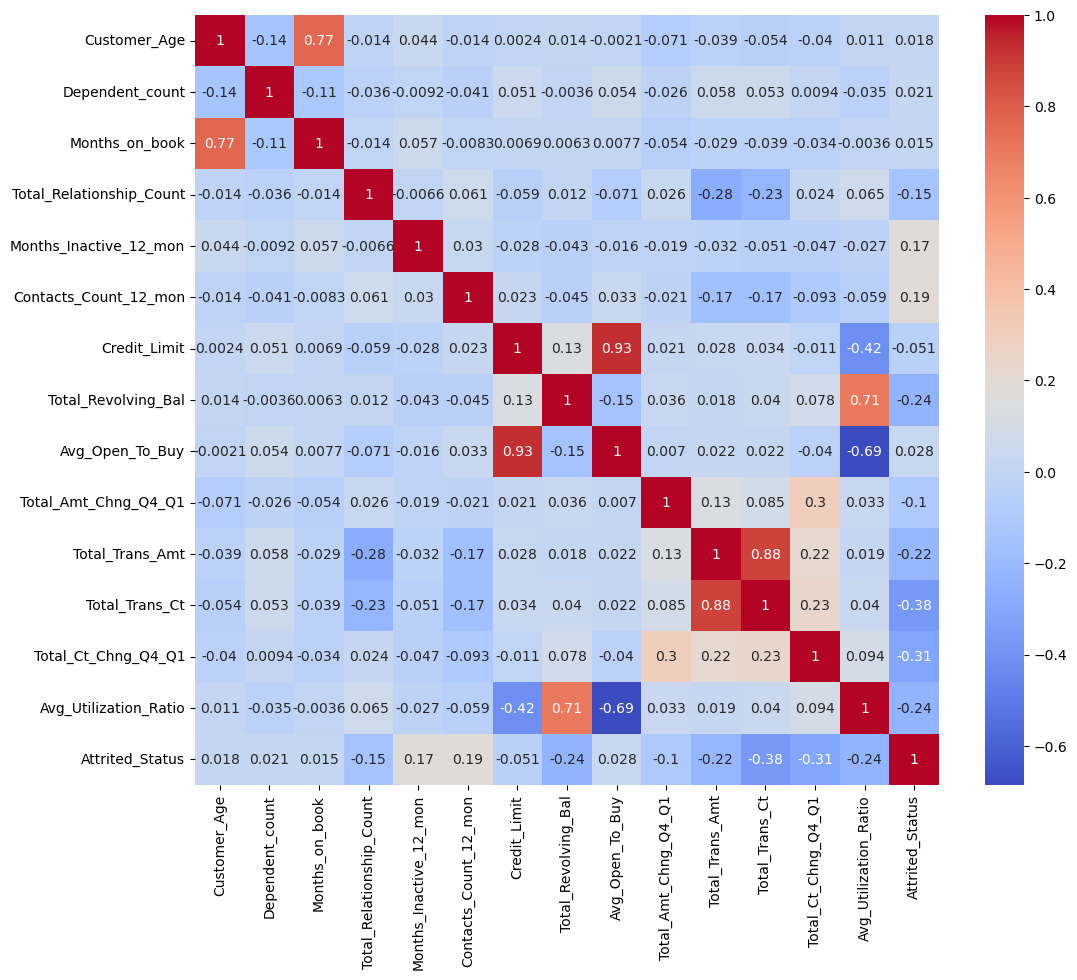

In [13]:
plt.figure(figsize=(12, 10))

sns.heatmap(numerical_features.corr('spearman'), cmap='coolwarm', annot=True)

### **List of questions that need to be examined**
1. From all cancellations what are the percentage for these categories?
   1. Gender
   2. Education Level
   3. Marital Status
   4. Annual Salary
   5. Card Type
2. What are the distribution of revovling balance in both existing and attrited customers?
3. Is it possible to classified customer status by using all time transaction count and amount?
4. Is it possible to classified customer status by using the change in transaction count and amount between Q4 and Q1?

##### 1.1 From all cancellations what are the percentage for Gender?

In [14]:
att_df = df[df['Attrition_Flag'] == 'Attrited Customer']

In [15]:
sex_att = pd.DataFrame(data=att_df.groupby('Gender')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
sex_att.columns = ['Cancellation_Percentage']
sex_att = sex_att.sort_values(by='Cancellation_Percentage', ascending=False)
sex_att = sex_att.reset_index()
sex_att['Gender'] = sex_att['Gender'].apply(lambda x: 'Female' if x  == 'F' else 'Male')
sex_att

,Gender,Cancellation_Percentage
0,Female,57.160418
1,Male,42.839582


In [16]:
fig = px.bar(
    sex_att, 
    x='Gender', 
    y='Cancellation_Percentage', 
    color='Gender',
    title='Cancellation Percentage by Customer Gender',
    labels={'Gender': 'Gender', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 65] 
    ),
    template='plotly_dark'
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

##### 1.2 From all cancellations what are the percentage for Education Level?

In [17]:
edu_att = pd.DataFrame(data=att_df.groupby('Education_Level')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
edu_att.columns = ['Cancellation_Percentage']
edu_att = edu_att.sort_values(by='Cancellation_Percentage', ascending=False)
edu_att = edu_att.reset_index()
edu_att

,Education_Level,Cancellation_Percentage
0,Graduate,29.932391
1,High School,18.807621
2,Unknown,15.734481
3,Uneducated,14.566687
4,College,9.465274
5,Doctorate,5.838967
6,Post-Graduate,5.654579


In [18]:
fig = px.bar(
    edu_att, 
    x='Education_Level', 
    y='Cancellation_Percentage', 
    color='Education_Level', 
    title='Cancellation Percentage by Customer Education Level',
    labels={'Education_Level': 'Education Level', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Education Level',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 35] 
    ),
    template='plotly_dark'
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

##### 1.3 From all cancellations what are the percentage for Marital Status?

In [19]:
mar_att = pd.DataFrame(data=att_df.groupby('Marital_Status')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
mar_att.columns = ['Cancellation_Percentage']
mar_att = mar_att.sort_values(by='Cancellation_Percentage', ascending=False)
mar_att = mar_att.reset_index()
mar_att

,Marital_Status,Cancellation_Percentage
0,Married,43.577136
1,Single,41.057160
2,Unknown,7.928703
3,Divorced,7.437001


In [20]:
fig = px.bar(
    mar_att, 
    x='Marital_Status', 
    y='Cancellation_Percentage', 
    color='Marital_Status',
    title='Cancellation Percentage by Customer Marital Status',
    labels={'Marital_Status': 'Marital Status ', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Marital Status',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 50] 
    ),
    template='plotly_dark'  
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

##### 1.4 From all cancellations what are the percentage for Annual Salary?

In [21]:
sal_att = pd.DataFrame(data=att_df.groupby('Income_Category')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
sal_att.columns = ['Cancellation_Percentage']
sal_att = sal_att.sort_values(by='Cancellation_Percentage', ascending=False)
sal_att = sal_att.reset_index()
sal_att

,Income_Category,Cancellation_Percentage
0,Less than $40K,37.615243
1,$40K - $60K,16.656423
2,$80K - $120K,14.874001
3,$60K - $80K,11.616472
4,Unknown,11.493546
5,$120K +,7.744315


In [22]:
fig = px.bar(
    sal_att, 
    x='Income_Category', 
    y='Cancellation_Percentage', 
    color='Income_Category',
    title='Cancellation Percentage by Customer Annual Salary',
    labels={'Income_Category': 'Annual Salary', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Annual Salary',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 40] 
    ),
    template='plotly_dark'
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

##### 1.5 From all cancellations what are the percentage for Cart type?

In [23]:
crd_att = pd.DataFrame(data=att_df.groupby('Card_Category')['CLIENTNUM'].count() / att_df['Attrition_Flag'].count() * 100)
crd_att.columns = ['Cancellation_Percentage']
crd_att = crd_att.sort_values(by='Cancellation_Percentage', ascending=False)
crd_att = crd_att.reset_index()
crd_att

,Card_Category,Cancellation_Percentage
0,Blue,93.362016
1,Silver,5.039951
2,Gold,1.290719
3,Platinum,0.307314


In [24]:
fig = px.bar(
    crd_att, 
    x='Card_Category', 
    y='Cancellation_Percentage', 
    color='Card_Category',
    title='Cancellation Percentage by Customer Card type',
    labels={'Card_Category': 'Card type', 'Cancellation_Percentage': 'Cancellation Percentage (%)'},
    text='Cancellation_Percentage'
)

fig.update_layout(
    xaxis_title='Card type',
    yaxis_title='Cancellation Percentage (%)',
    yaxis=dict(
        range=[0, 100] 
    ),
    template='plotly_dark'
)

fig.update_traces(
    texttemplate='%{text:.2f}%',
    textposition='outside',
    textfont=dict(size=12, color='white')
)

fig.show()

##### 2. What are the distribution of revovling balance in both existing and attrited customers?

In [25]:
fig = px.box(
    df,
    x='Attrition_Flag',
    y='Total_Revolving_Bal',
    color='Attrition_Flag',
    title='Distribution of Revolving Balance by Attrition Status',
    points='all'
)

fig.update_layout(
    template='plotly_dark',
    xaxis_title='Attrition Status',
    yaxis_title='Customer Revolving Balance ($)',
    legend_title='Attrition Status'
)

statistics = df.groupby('Attrition_Flag')['Total_Revolving_Bal'].describe()

for attrition_flag in statistics.index:
    stats = statistics.loc[attrition_flag]
    q1 = stats['25%']
    median = stats['50%']
    q3 = stats['75%']
    min_fence = stats['min']
    max_fence = stats['max']

    vertical_positions = {
        'Min': (min_fence, 'left'),
        'Q1': (q1, 'right'),
        'Median': (median, 'left'),
        'Q3': (q3, 'right'),
        'Max': (max_fence, 'left')
    }

    for label, (y, position) in vertical_positions.items():
        ax_offset = -50 if position == 'left' else 50 
        fig.add_annotation(
            x=attrition_flag,
            y=y,
            text=f'{label}: ${y:.2f}',
            showarrow=True,
            arrowhead=1,
            font=dict(color="white"),
            ax=ax_offset,
            ay=0,
            xanchor='right' if position == 'left' else 'left'
        )

fig.show()


##### 3. Is it possible to classified customer status by using all time transaction count and amount?

In [26]:
fig = px.scatter(
    df,
    y='Total_Trans_Ct',
    x='Total_Trans_Amt',
    color='Attrition_Flag',
    title='Scatter Plot of Total Transaction Amount vs. Total Transaction Count',
    labels={'Total_Trans_Ct': 'Total Transaction Count', 'Total_Trans_Amt': 'Total Transaction Amount ($)'},
    template='plotly_dark'
)

fig.update_layout(
    yaxis_title='Total Transaction Count',
    xaxis_title='Total Transaction Amount ($)',
    legend_title='Attrition Status',
)

fig.show()

##### 4. Is it possible to classified customer status by using the change in transaction count and amount between Q4 and Q1?

In [27]:
fig = px.scatter(
    df,
    y='Total_Ct_Chng_Q4_Q1',
    x='Total_Amt_Chng_Q4_Q1',
    color='Attrition_Flag',
    title='Scatter Plot of Total Transaction Amount vs. Total Transaction Count change from Q4 to Q1',
    labels={'Total_Ct_Chng_Q4_Q1': 'Total Transaction Count', 'Total_Amt_Chng_Q4_Q1': 'Total Transaction Amount'},
    template='plotly_dark'
)

fig.update_layout(
    yaxis_title='Total Transaction Count',
    xaxis_title='Total Transaction Amount',
    legend_title='Attrition Status',
)

fig.show()

# **Preprocessing Data**

Onehot encoding all of the categorical columns in the dataframe

In [28]:
categorical_features_no_att = categorical_features.drop(columns=['Attrition_Flag'])
encoder = OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output = False)
cat_encoded = encoder.fit_transform(categorical_features_no_att)
encoded_columns = encoder.get_feature_names_out(categorical_features_no_att.columns)
encoded_df = pd.DataFrame(cat_encoded, columns=encoded_columns)

Heatmap will be used to identify correlation between "Attrited_Status" column with others, therefore only correlated columns will be filter out for model training

<Axes: >

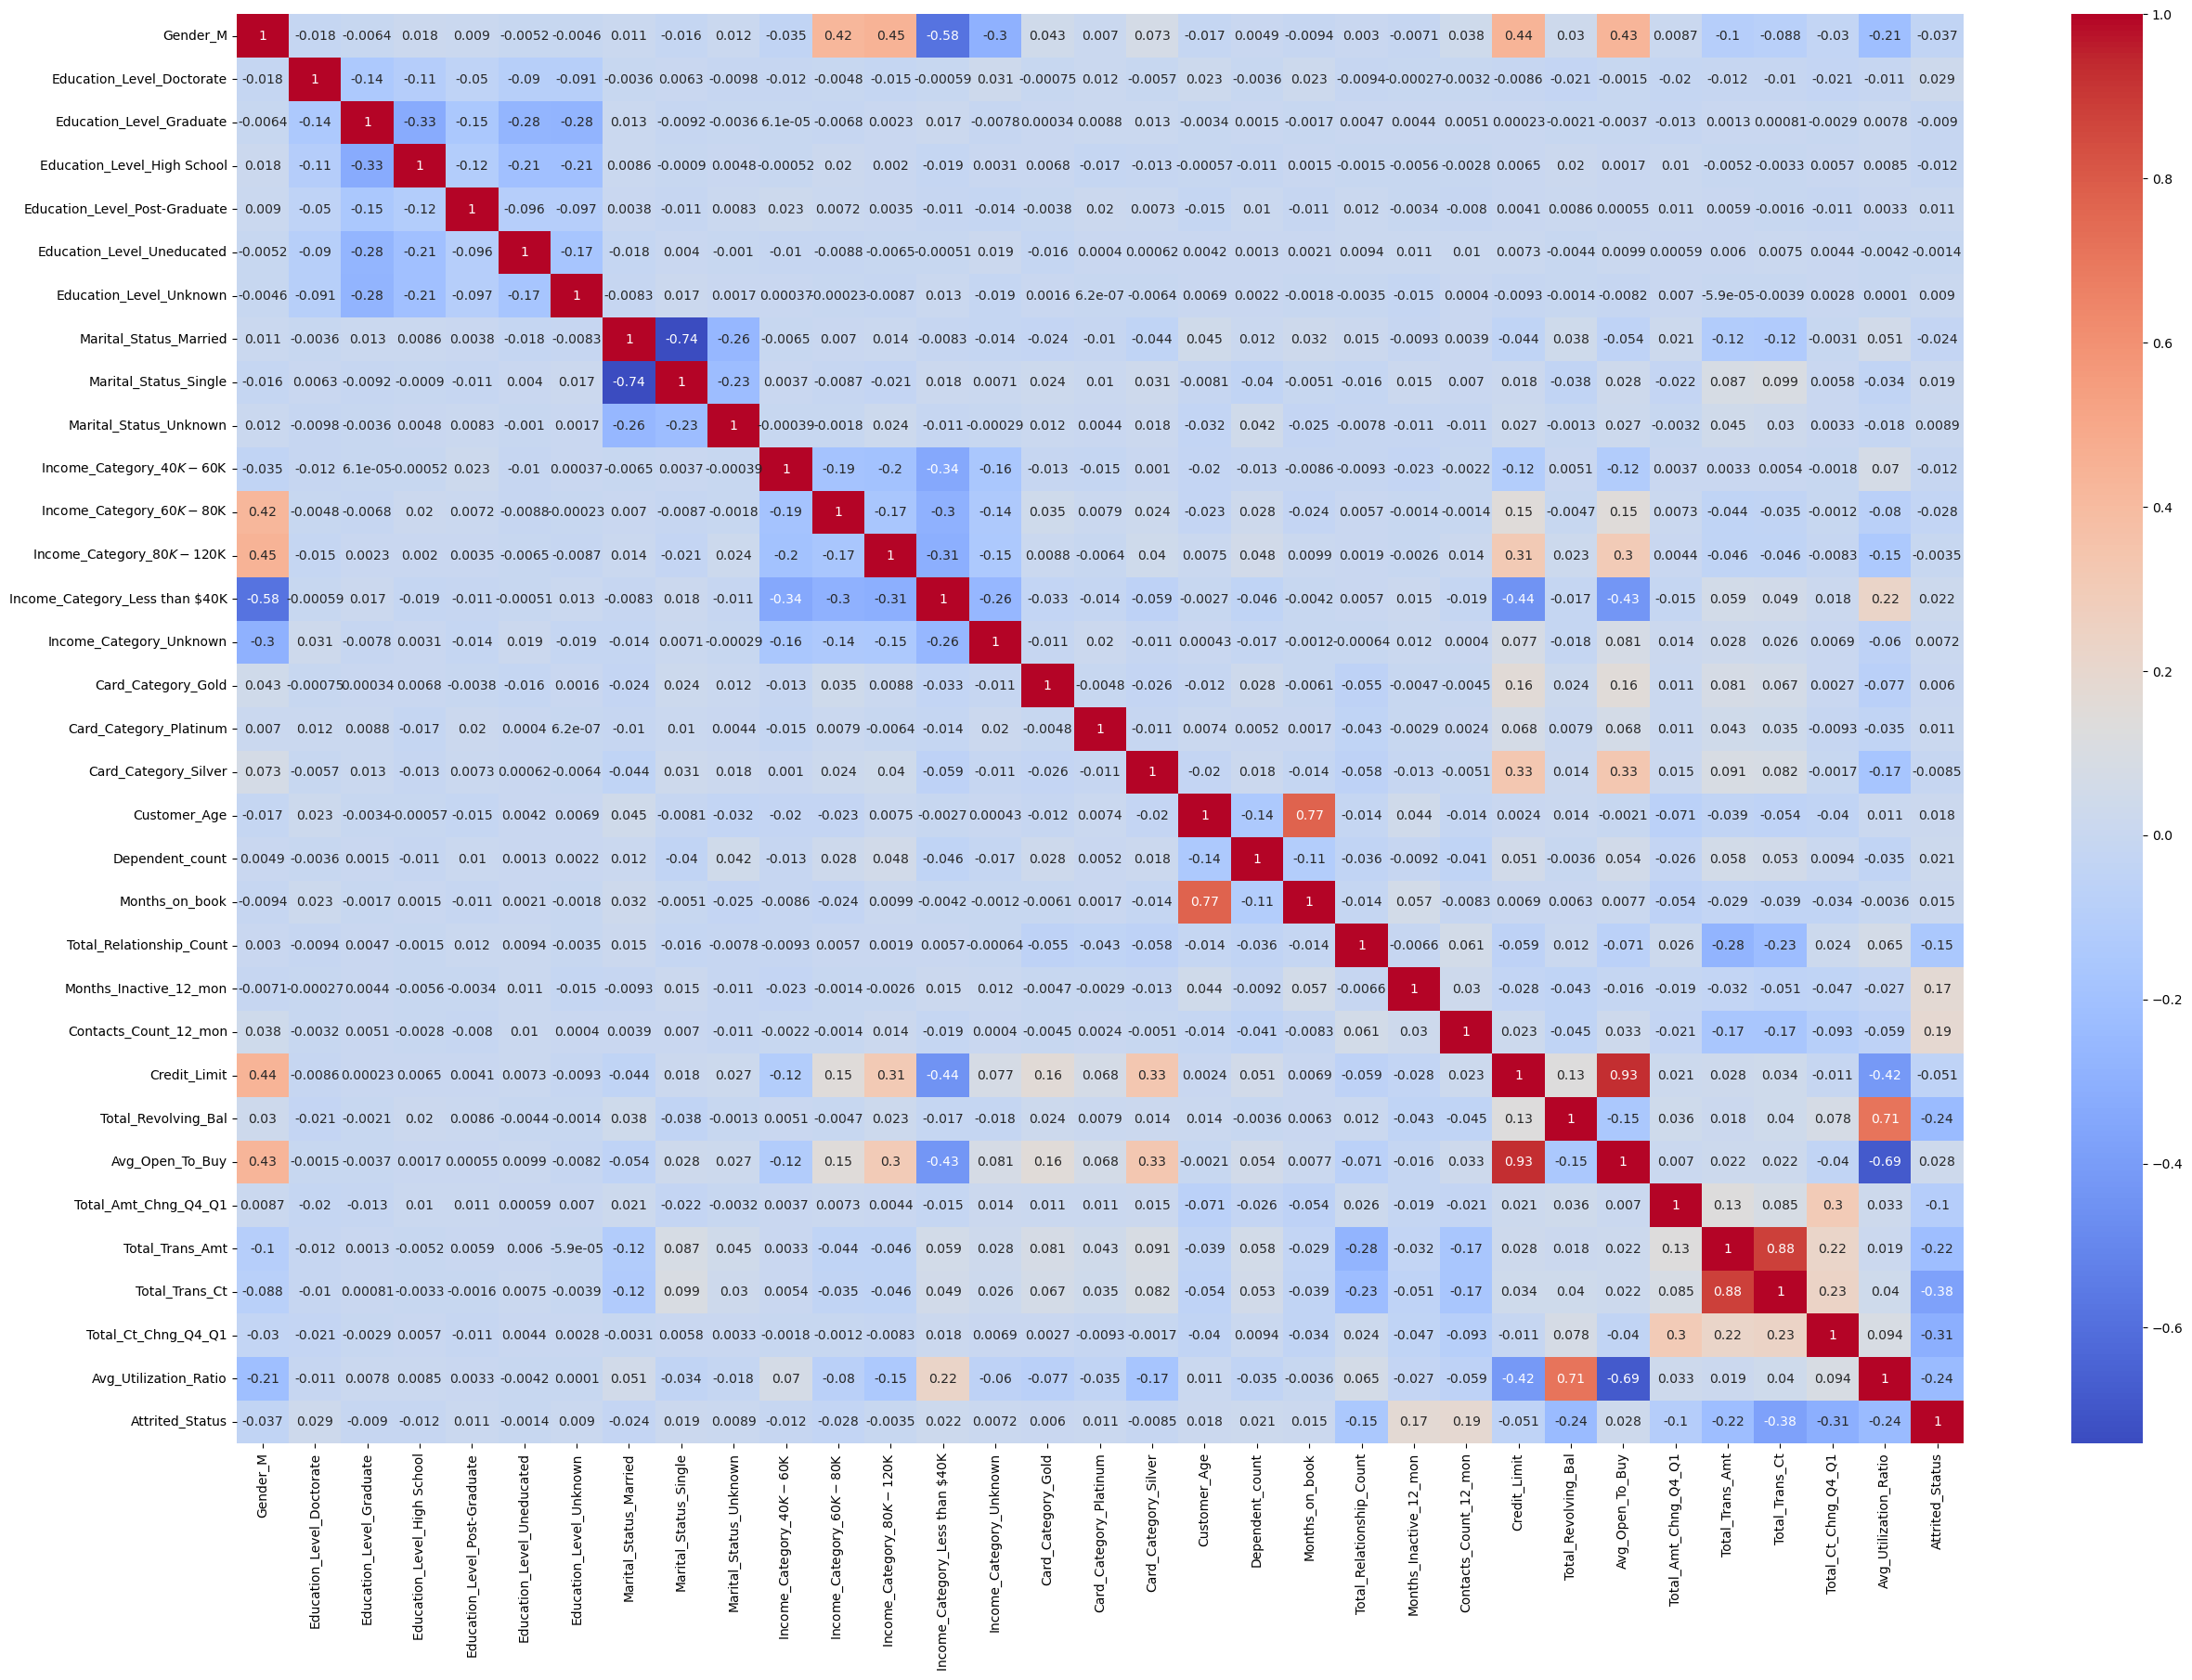

In [29]:
heatmap_df = pd.concat([encoded_df,numerical_features], axis=1)
heatmap_corr = heatmap_df.corr('spearman')

plt.figure(figsize=(30, 20))
sns.heatmap(heatmap_corr, cmap='coolwarm', annot=True)

According to the heat only 9 columns listed below will be chosen in the model training process
- Avg_Utilization_Ratio
- Total_Ct_Chng_Q4_Q1
- Total_Trans_Ct
- Total_Trans_Amt
- Total_Amt_Chng_Q4_Q1
- Total_Revolving_Bal
- Contacts_Count_12_mon
- Months_Inactive_12_mon
- Total_Relationship_Count

### Creating Pipelines

In [30]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore', sparse_output = False))
])

categorical_columns = []
numerical_columns = ['Avg_Utilization_Ratio', 'Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Trans_Amt', 
                     'Total_Amt_Chng_Q4_Q1', 'Total_Revolving_Bal', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Total_Relationship_Count']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'drop')

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

Since categorical columns are not the selection of the training process, hence the value of categorical_columns is a blank list.
(FYI: you can just remove all of the categorical variables)

In [31]:
X = df.drop(columns=['Attrition_Flag'])
y = df['Attrition_Flag'].apply(lambda x : 1 if x == 'Attrited Customer' else 0)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_preprocessed = pipeline.fit_transform(X_train)
X_test_preprocessed= pipeline.transform(X_test)

As we all know that this dataset is imbalance with only around 16% of attrited customers. The upsampling process is used to increase the number of it to match the existing data

In [34]:
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train_preprocessed, y_train)

# Model Training

GridSearchCV and KFold are being used to train data multiple times and return the best parameters for every models for selection

In [35]:
models = {
    'LogisticRegression': LogisticRegression(),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVC': SVC(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
}

param_grids = {
    'LogisticRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10]
    },
    'SVC': {
        'C': [0.5, 0.75, 1], 
        'kernel': ['rbf']
    },
    'DecisionTree': {
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10]
    }
    
}

cv = KFold(n_splits=3, shuffle=True, random_state=42)

grids = {}
for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv,scoring='accuracy', n_jobs=-1, verbose=1)
    grids[model_name].fit(X_train_sm, y_train_sm)
    best_params = grids[model_name].best_params_
    best_score = grids[model_name].best_score_
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best accuracy for {model_name}: {best_score}\n')

Training and tuning LogisticRegression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LogisticRegression: {}
Best accuracy for LogisticRegression: 0.8498750183796501

Training and tuning RandomForest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy for RandomForest: 0.9734597853256873

Training and tuning XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 10, 'n_estimators': 500}
Best accuracy for XGBoost: 0.976621085134539

Training and tuning SVC...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best accuracy for SVC: 0.933392148213498

Training and tuning DecisionTree...
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters for DecisionTree: {'max_depth':

# Model Evaluation

Predict the value of testing data by using the best parameters from the previous section, then evaluate which model is the best for this task

In [36]:
for i in grids.keys():
    y_pred = grids[i].predict(X_test_preprocessed)
    print (i)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print("==========================================================")
    print()

LogisticRegression
              precision    recall  f1-score   support

           0       0.96      0.85      0.91      1699
           1       0.52      0.84      0.64       327

    accuracy                           0.85      2026
   macro avg       0.74      0.85      0.78      2026
weighted avg       0.89      0.85      0.86      2026

[[1450  249]
 [  53  274]]

RandomForest
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1699
           1       0.84      0.89      0.87       327

    accuracy                           0.96      2026
   macro avg       0.91      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026

[[1645   54]
 [  36  291]]

XGBoost
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1699
           1       0.85      0.88      0.87       327

    accuracy                           0.96      2026
   macro avg       0.91      0.9

It's turn out that XGBoost is the winner model with the highest score in every aspect

Plot a confusion matrix and create a table classification report for the XGBoost Model

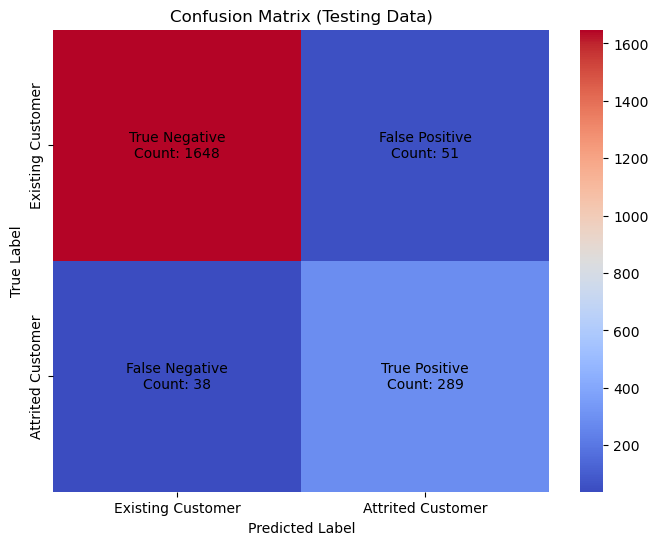

In [40]:
y_pred = grids['XGBoost'].predict(X_test_preprocessed)

cm = confusion_matrix(y_test, y_pred)

labels = ['Existing Customer', 'Attrited Customer']

annotations = np.array([['True Negative', 'False Positive'], 
                        ['False Negative', 'True Positive']])

plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=False, fmt='d', cmap='coolwarm', cbar=True, xticklabels=labels, yticklabels=labels)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = annotations[i, j] + f"\nCount: {cm[i, j]}"
        ax.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

plt.title('Confusion Matrix (Testing Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [41]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

report_df = pd.DataFrame(report_dict).transpose()
report_df = report_df.round(2)

fig = go.Figure(data=[go.Table(
    header=dict(
        values=['Class'] + list(report_df.columns),
        fill_color='black',
        font=dict(color='white', size=12),
        align='center'
    ),
    cells=dict(
        values=[report_df.index] + [report_df[col] for col in report_df.columns],
        fill_color='black',
        font=dict(color='white', size=12),
        align='center',
        height=25
    )
)])

fig.update_layout(
    title="Classification Report (Testing Data)",
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(color='white')
)

fig.show()